Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

ModuleNotFoundError: No module named 'matplotlib'

## Data Loading

In this example we will load the infrared spectra in a folder

In [ ]:
cwd = os.path.dirname(os.getcwd())                                                                                                      # Get current directory
path = cwd + "/graph_templates/example_datas/infrared"                                                                                  # Set your data directory path here (modify as needed)
save_path = cwd + "/graph_templates/figures"                                                                                            # Set your save directory path here (modify as needed)
list_files = os.listdir(path)                                                                                                           # Get a list of all files in the specified directory
ir_dictionary = {}                                                                                                                      # Initialize an empty dictionary to store dataframes for each file
column_names = ["wavenumber", "absorption"]                                                                                             # Define column names for the data (adjust if your data has different headers)

for file in list_files:                                                                                                                 # Loop through each file in the directory
    ir_dictionary[file[:-4]] = pd.read_table(path + "/" + file, sep=",", header=None, names=column_names)                               # Load each file into the dictionary, removing '.dpt' (last 4 characters) from the key name
                                                                                                                                        # Note: sep="," assumes comma-separated data; change to "\t" for tab-separated, etc.
                                                                                                                                        # header=None assumes no header row in files; remove if your files have headers
print(ir_dictionary.keys())

c:\0.MyPC\1.School-MUN Job\CodeProjects\BEAToolBox
dict_keys(['20230313_BEA021', 'Aragonite_R040078', 'Calcite_R040070', 'mix3_b', 'mix3_w1d_b', 'mix3_w1h_b', 'mix3_w1m_b', 'mix3_w1w_b', 'mix3_w2d_b'])


# **Single Line plot**

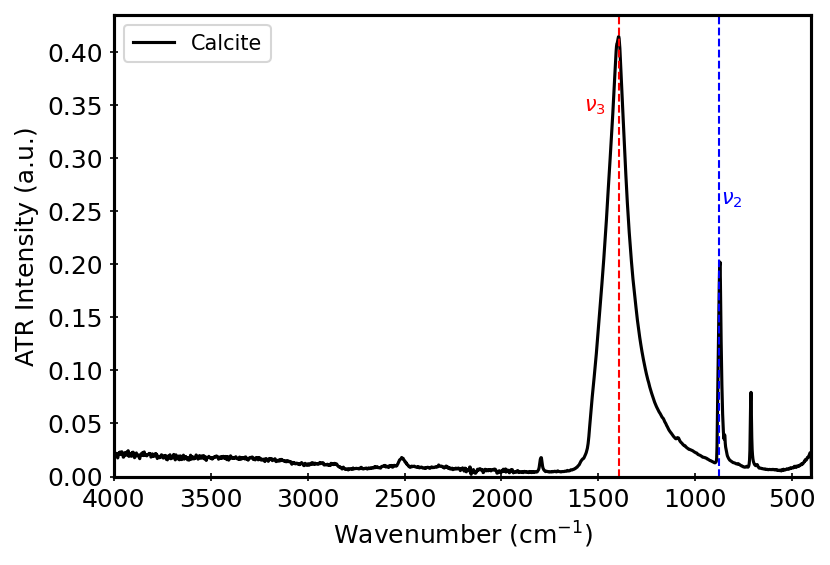

In [ ]:
# --- User-Configurable Parameters ---
data_key = 'Calcite_R040070'                                                                      # Select the key from ir_dictionary for your data
x_column = 'wavenumber'                                                                           # Column name for x-axis data
y_column = 'absorption'                                                                           # Column name for y-axis data

# Plot style parameters
line_color = 'black'                                                                              # Line color (e.g., 'black', 'blue', '#FF0000')
line_style = '-'                                                                                  # Line style (e.g., '-' solid, '--' dashed, ':' dotted)
line_width = 1.5                                                                                  # Line thickness
linewidth_inches = 6.5                                                                             # Match LaTeX text width (article class, 1-inch margins)
aspect_ratio = 1 / 1.618                                                                           # Golden ratio (height/width)
fig_height = linewidth_inches * aspect_ratio                                                       # ≈ 4.02 inches
figure_size = (linewidth_inches, fig_height)							                           # Overall figure size (width, height) in inches (widened for horizontal layout)
dpi = 150                                                                                         # Resolution for display
save_dpi = 300                                                                                    # Resolution for saved figure
font_size = 12                                                                                    # Size for all text (ticks and labels)
axes_linewidth = 1.5                                                                              # Thickness of axes lines
tick_direction = 'inout'                                                                          # Tick direction ('in', 'out', 'inout')

# Axis parameters
x_axis_lim = (4000, 400)                                                                          # X-axis limits (min, max); use None for auto (e.g., (None, None))
y_axis_lim = (0, None)                                                                            # Y-axis limits (min, max); use None for auto
x_label = r'Wavenumber (cm$^{-1}$)'                                                               # X-axis label (use r'' for LaTeX formatting)
y_label = r'ATR Intensity (a.u.)'                                                                 # Y-axis label

# Legend parameters
legend_label = 'Calcite'                                                                          # Text to display in legend
legend_location = 'upper left'                                                                    # Position (e.g., 'upper left', 'lower right', 'best')
legend_fontsize = 10                                                                              # Font size for legend text
show_legend = True                                                                                # Set to False to hide legend

# Vertical line parameters
vlines_positions = [1395, 875]                                                                    # List of x-positions for vertical lines (e.g., peak positions)
vlines_colors = ['red', 'blue']                                                                   # Colors for each vertical line (match length to vlines_positions)
vlines_styles = ['--', '--']                                                                      # Line styles for each vertical line (e.g., '--' dashed, '-' solid)
vlines_widths = [1.0, 1.0]                                                                        # Line widths for each vertical line
show_vlines = True                                                                                # Set to False to hide vertical lines

# Text label parameters for vertical lines
vlines_text = [r'$\nu_3$', r'$\nu_2$']                                                            # Text labels for each vline (match length to vlines_positions)
vlines_text_x_offset = [180, -10]                                                                 # Horizontal offset from vline position (in data units)
vlines_text_y_pos = [0.8, 0.6]                                                                    # Vertical position (0 to 1, relative to y-axis limits)
vlines_text_fontsize = 10                                                                         # Font size for text labels
vlines_text_colors = ['red', 'blue']                                                              # Colors for text (match length to vlines_positions)
show_vlines_text = True                                                                           # Set to False to hide text labels

# Modify the variables above
###################################################################################################################################################################################################################################################
# --- Configure Plot Style ---
plt.rcParams['axes.linewidth'] = axes_linewidth
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams['ytick.direction'] = tick_direction
plt.rcParams['xtick.direction'] = tick_direction
plt.rcParams['figure.figsize'] = figure_size
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['lines.markersize'] = 12                                                             # Marker size (if markers used)

# --- Select Data ---
x = ir_dictionary[data_key][x_column]                                                             # Extract x-data from dictionary
y = ir_dictionary[data_key][y_column]                                                             # Extract y-data from dictionary

# --- Create Figure ---
fig, ax = plt.subplots()                                                                          # Initialize figure and axis

# Plot the data
ax.plot(x, y, color=line_color, linestyle=line_style, linewidth=line_width, label=legend_label)

# Set axis limits and labels
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# --- Add Legend ---
if show_legend:
    ax.legend(loc=legend_location, fontsize=legend_fontsize)

# --- Add Vertical Lines and Text ---
if show_vlines:
    for pos, color, style, width in zip(vlines_positions, vlines_colors, vlines_styles, vlines_widths):
        ax.axvline(x=pos, color=color, linestyle=style, linewidth=width)

if show_vlines_text and show_vlines:
    y_min, y_max = ax.get_ylim()  # Get current y-axis limits
    for pos, text, x_offset, y_pos, color, fontsize in zip(
        vlines_positions, vlines_text, vlines_text_x_offset, vlines_text_y_pos, vlines_text_colors, [vlines_text_fontsize]*len(vlines_positions)
    ):
        # Calculate absolute y-position from relative value
        y_text_pos = y_min + y_pos * (y_max - y_min)
        # Add text next to vline
        ax.text(pos + x_offset, y_text_pos, text, color=color, fontsize=fontsize, verticalalignment='center')


# --- Save Figure ---
# plt.savefig(save_path + "/figures.pdf", dpi=save_dpi, bbox_inches='tight')                                        # Uncomment to use. Save with high resolution

# --- Display Figure ---
plt.show()

# **Stacked Line Plots**

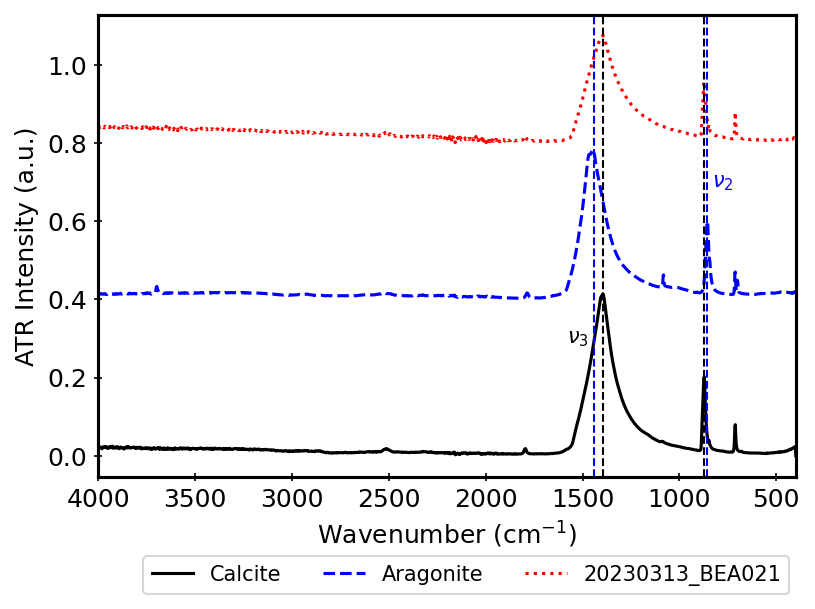

In [ ]:
# Stacked Line Plots

# --- User-Configurable Parameters ---
data_keys = ['Calcite_R040070', 'Aragonite_R040078','20230313_BEA021']		                              # List of keys from ir_dictionary for stacking
x_column = 'wavenumber'							                                                                    # Column name for x-axis data
y_column = 'absorption'							                                                                    # Column name for y-axis data

# Plot style parameters
line_colors = ['black', 'blue','red']						                                                        # Colors for each line (match length to data_keys)
line_styles = ['-', '--',':']						                                                                # Line styles (e.g., '-' solid, '--' dashed, ':' dotted)
line_widths = [1.5, 1.5,1.5]						                                                                # Line thicknesses
linewidth_inches = 6.5                                                                                                 # Match LaTeX text width (article class, 1-inch margins)
aspect_ratio = 1 / 1.618                                                                                                # Golden ratio (height/width)
fig_height = linewidth_inches * aspect_ratio                                                                            # ≈ 4.02 inches
figure_size = (linewidth_inches, fig_height)							                                                # Overall figure size (width, height) in inches (widened for horizontal layout)
dpi = 150								                                                                                # Resolution for display
save_dpi = 300								                                                                          # Resolution for saved figure
font_size = 12								                                                                          # Size for all text (ticks and labels)
axes_linewidth = 1.5							                                                                      # Thickness of axes lines
tick_direction = 'inout'						                                                                    # Tick direction ('in', 'out', 'inout')

# Axis parameters
x_axis_lim = (4000, 400)						                                                                    # X-axis limits (min, max); use None for auto (e.g., (None, None))
y_offset = 0.4								                                                                          # Vertical offset between spectra (in y-axis units)
x_label = r'Wavenumber (cm$^{-1}$)'					                                                            # X-axis label (use r'' for LaTeX formatting)
y_label = r'ATR Intensity (a.u.)'				                                                                # Y-axis label

# Legend parameters
legend_labels = ['Calcite','Aragonite','20230313_BEA021']					                                      # Text for each line in legend (match length to data_keys)
legend_location = 'upper right'						                                                              # Position inside plot (e.g., 'upper left', 'lower right', 'best')
legend_bbox = (0.05, -0.15)						                                                                  # (x, y) coordinates for legend outside plot (None to disable)
legend_columns = 3							                                                                        # Number of columns in legend (e.g., 1, 2)
legend_fontsize = 10							                                                                      # Font size for legend text
show_legend = True							                                                                        # Set to False to hide legend

# Vertical line parameters
vlines_positions = [1395, 875, 1440, 855]						                                                    # List of x-positions for vertical lines (e.g., peak positions)
vlines_colors = ['black','black', 'blue', 'blue']						                                            # Colors for each vertical line (match length to vlines_positions)
vlines_styles = ['--', '--', '--', '--']						                                                    # Line styles for each vertical line (e.g., '--' dashed, '-' solid)
vlines_widths = [1.0, 1.0, 1.0, 1.0]						                                                        # Line widths for each vertical line
show_vlines = True							                                                                        # Set to False to hide vertical lines

# Independent text label parameters
text_labels = [r'$\nu_3$', r'$\nu_2$']					                                                        # List of text labels
text_x_positions = [1580,830]						                                                                # X-positions for each text label
text_y_positions = [0.3,0.7]						                                                                # Absolute y-positions in data units
text_fontsize = 10							                                                                        # Font size for text labels
text_colors = ['black','blue']							                                                            # Colors for each text label (match length to text_labels)
show_text = True							                                                                          # Set to False to hide text labels

# Modify the variables above
###################################################################################################################################################################################################################################################
# --- Configure Plot Style ---
plt.rcParams['axes.linewidth'] = axes_linewidth				                                                  # Set axes line thickness
plt.rcParams['ytick.left'] = True					                                                              # Enable left y-ticks
plt.rcParams['ytick.labelleft'] = True					                                                        # Show y-tick labels on left
plt.rcParams['ytick.direction'] = tick_direction			                                                  # Set y-tick direction
plt.rcParams['xtick.direction'] = tick_direction			                                                  # Set x-tick direction
plt.rcParams['figure.figsize'] = figure_size				                                                    # Set figure size
plt.rcParams['figure.dpi'] = dpi					                                                              # Set display resolution
plt.rcParams['xtick.labelsize'] = font_size				                                                      # Set x-tick label size
plt.rcParams['ytick.labelsize'] = font_size				                                                      # Set y-tick label size
plt.rcParams['axes.labelsize'] = font_size				                                                      # Set axes label size
plt.rcParams['lines.markersize'] = 12					                                                          # Marker size (if markers used)

# --- Create Figure ---
fig, ax = plt.subplots()						                                                                    # Initialize figure and axis

# --- Plot Stacked Spectra ---
for i, (key, color, style, width, label) in enumerate(zip(data_keys, line_colors, line_styles, line_widths, legend_labels)):
    x = ir_dictionary[key][x_column]				                                                            # Extract x-data
    y = ir_dictionary[key][y_column]				                                                            # Extract y-data
    y_offset_value = i * y_offset				                                                                # Calculate offset for this spectrum
    ax.plot(x, y + y_offset_value, color=color, linestyle=style, linewidth=width, label=label)	        # Plot with offset

# Set axis limits and labels
ax.set_xlim(x_axis_lim)							                                                                    # Set x-axis limits
ax.set_xlabel(x_label)							                                                                    # Set x-axis label
ax.set_ylabel(y_label)							                                                                    # Set y-axis label

# --- Add Legend ---
if show_legend:
    if legend_bbox is None:
        ax.legend(loc=legend_location, fontsize=legend_fontsize, ncol=legend_columns)	                  # Place legend inside plot
    else:
        ax.legend(loc='upper left', bbox_to_anchor=legend_bbox, fontsize=legend_fontsize, ncol=legend_columns)	# Place legend outside plot

# --- Add Vertical Lines ---
if show_vlines:
    for pos, color, style, width in zip(vlines_positions, vlines_colors, vlines_styles, vlines_widths):
        ax.axvline(x=pos, color=color, linestyle=style, linewidth=width)	                               # Draw each vertical line

# --- Add Independent Text Labels ---
if show_text:
    for x_pos, text, y_pos, color, fontsize in zip(
        text_x_positions, text_labels, text_y_positions, text_colors, [text_fontsize]*len(text_labels)
    ):
        ax.text(x_pos, y_pos, text, color=color, fontsize=fontsize, verticalalignment='center')	         # Add text label at absolute y-position

# --- Save Figure ---
# plt.savefig(save_path + "/figures.pdf", dpi=save_dpi, bbox_inches='tight')                             # Uncomment to use. Save with high resolution

# --- Display Figure ---
plt.show()								                                                                               # Display the plot

# **Stacked subplots**

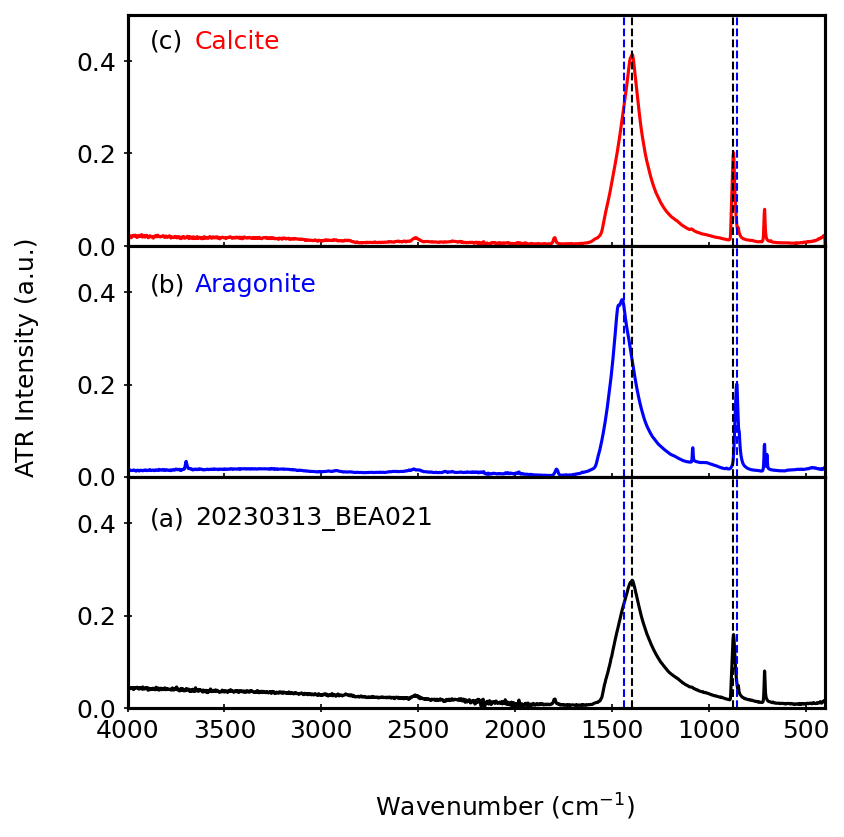

In [ ]:
# --- User-Configurable Parameters ---
data_keys = ['Calcite_R040070', 'Aragonite_R040078', '20230313_BEA021']		                                # List of keys from ir_dictionary for subplots
x_column = 'wavenumber'							                                                                      # Column name for x-axis data
y_column = 'absorption'							                                                                      # Column name for y-axis data

# Plot style parameters
line_colors = ['red', 'blue','black']					                                                            # Colors for each line (match length to data_keys)
line_styles = ['-', '-', '-']						                                                                  # Line styles (e.g., '-' solid, '--' dashed, ':' dotted)
line_widths = [1.5, 1.5, 1.5]						                                                                  # Line thicknesses (corrected to match data_keys length)
linewidth_inches = 6.5                                                                                                 # Match LaTeX text width (article class, 1-inch margins)
aspect_ratio = 1 / 1.618                                                                                                # Golden ratio (height/width)
fig_height = linewidth_inches * aspect_ratio                                                                            # ≈ 4.02 inches
figure_size = (linewidth_inches, fig_height)							                                                # Overall figure size (width, height) in inches (widened for horizontal layout)
dpi = 150								                                                                                  # Resolution for display
save_dpi = 300								                                                                            # Resolution for saved figure
font_size = 12								                                                                            # Size for all text (ticks and labels)
axes_linewidth = 1.5							                                                                        # Thickness of axes lines
tick_direction = 'inout'						                                                                      # Tick direction ('in', 'out', 'inout')

# Axis parameters
x_axis_lim = (4000, 400)						                                                                      # X-axis limits (min, max); use None for auto
y_axis_lim = (0, 0.5)							                                                                        # Y-axis limits (min, max); use None for auto
vertical_gap = 0							                                                                            # Vertical gap between subplots (adjustable, e.g., 0.2 to 1.0)

# Vertical line parameters
vlines_positions = [1395, 875, 1440, 855]				                                                          # List of x-positions for vertical lines (e.g., peak positions)
vlines_colors = ['black', 'black', 'blue', 'blue']			                                                  # Colors for each vertical line (match length to vlines_positions)
vlines_styles = ['--', '--', '--', '--']				                                                          # Line styles for each vertical line (e.g., '--' dashed, '-' solid)
vlines_widths = [1.0, 1.0, 1.0, 1.0]					                                                            # Line widths for each vertical line
show_vlines = True							                                                                          # Set to False to hide vertical lines

# Independent text and legend label parameters
fontsize = 12								                                                                              # Font size for text labels
x_label = [r'Wavenumber (cm$^{-1}$)',0.4,0]					                                                      # X-axis label (use r'' for LaTeX formatting),x-position,y-position
y_label = [r'ATR Intensity (a.u.)',0,0.5]					                                                        # Y-axis label (shared across subplots),x-position,y-position
text_labels = ["(a)","(b)","(c)"]					                                                                # List of text labels
x_text_labels = [0.15,0.15,0.15]                                                                          # X-postion of the text labels
y_text_labels = [0.32,0.58,0.85]                                                                          # Y-postion of the text labels

# Legend parameters
legend_labels = ['Calcite', 'Aragonite', '20230313_BEA021']		                                            # Text for each line in legend (match length to data_keys)
legend_colors = ['red', 'blue','black']
x_legend_labels = [0.2,0.2,0.2]                                                                           # X-postion of the text labels
y_legend_labels = [0.85,0.58,0.32]                                                                        # Y-postion of the text labels

# Y-Ticks
y_ticks = [[0,0.2,0.4],
           [0,0.2,0.4],
           [0,0.2,0.4]]

# Modify the variables above
###################################################################################################################################################################################################################################################
# --- Configure Plot Style ---
plt.rcParams['axes.linewidth'] = axes_linewidth				                                                    # Set axes line thickness
plt.rcParams['ytick.left'] = True					                                                                # Enable left y-ticks
plt.rcParams['ytick.labelleft'] = True					                                                          # Show y-tick labels on left
plt.rcParams['ytick.direction'] = tick_direction			                                                    # Set y-tick direction
plt.rcParams['xtick.direction'] = tick_direction			                                                    # Set x-tick direction
plt.rcParams['figure.dpi'] = dpi					                                                                # Set display resolution
plt.rcParams['xtick.labelsize'] = font_size				                                                        # Set x-tick label size
plt.rcParams['ytick.labelsize'] = font_size				                                                        # Set y-tick label size
plt.rcParams['axes.labelsize'] = font_size				                                                        # Set axes label size
plt.rcParams['lines.markersize'] = 12					                                                            # Marker size (if markers used)

# --- Create Figure with Subplots ---
fig, axes = plt.subplots(nrows=len(data_keys), ncols=1, sharex=True, figsize=figure_size, height_ratios=[1]*len(data_keys))
plt.subplots_adjust(hspace=vertical_gap)
if len(data_keys) == 1:							                                                                      # Ensure axes is iterable even for one subplot
    axes = [axes]

# --- Plot Spectra in Subplots ---
for i, (ax, key, color, style, width, label,y_tick) in enumerate(zip(axes, data_keys, line_colors, line_styles, line_widths, legend_labels,y_ticks)):
    x = ir_dictionary[key][x_column]				                                                              # Extract x-data
    y = ir_dictionary[key][y_column]				                                                              # Extract y-data
    ax.plot(x, y, color=color, linestyle=style, linewidth=width, label=label)	# Plot spectrum

    # Set axis limits and labels
    ax.set_xlim(x_axis_lim)						                                                                    # Set x-axis limits
    ax.set_ylim(y_axis_lim)						                                                                    # Set y-axis limits
    ax.set_yticks(y_tick)                                                                                 # Set y-axis limits

    # --- Add Vertical Lines ---
    if show_vlines:
        for pos, vcolor, vstyle, vwidth in zip(vlines_positions, vlines_colors, vlines_styles, vlines_widths):
            ax.axvline(x=pos, color=vcolor, linestyle=vstyle, linewidth=vwidth)	                          # Draw each vertical line


# --- Add legend labels and text labels separately ---
plt.figtext(x_label[1], x_label[2], x_label[0], color='black', fontsize=fontsize, verticalalignment='center')	# Add  x-label
plt.figtext(y_label[1], y_label[2], y_label[0], color='black', fontsize=fontsize, verticalalignment='center',rotation='vertical')	# Add  y-label

for i in range(len(text_labels)):
    plt.figtext(x_text_labels[i], y_text_labels[i], text_labels[i], color='black', fontsize=fontsize, verticalalignment='center')	# Add text labels
for i in range(len(legend_labels)):
    plt.figtext(x_legend_labels[i], y_legend_labels[i], legend_labels[i], color=legend_colors[i], fontsize=fontsize, verticalalignment='center')	# Add text labels


# # --- Save Figure ---
# plt.savefig(save_path + "/figures.pdf", dpi=save_dpi, bbox_inches='tight')	# Uncomment to save with high resolution

# --- Display Figure ---
plt.show()								# Display the plot

# **Horizontaly aligned subplots**

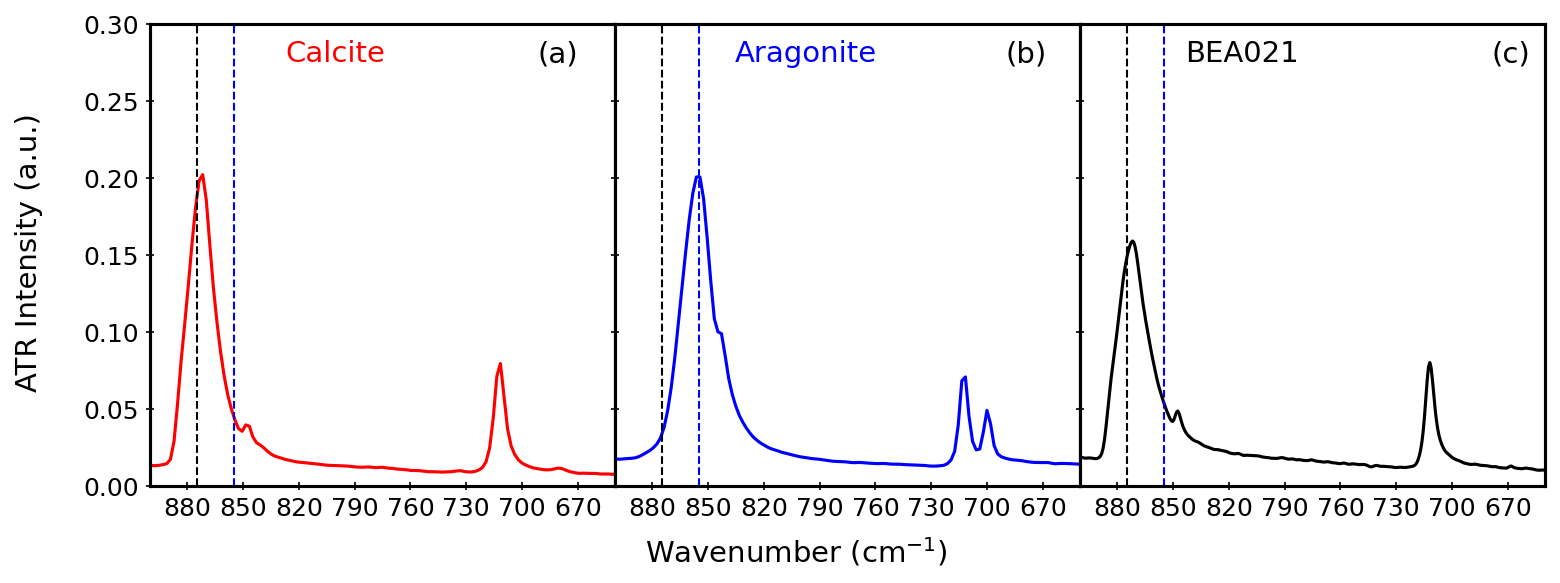

In [ ]:
# --- User-Configurable Parameters ---
data_keys = ['Calcite_R040070', 'Aragonite_R040078', '20230313_BEA021']		                                # List of keys from ir_dictionary for subplots
x_column = 'wavenumber'							                                                                      # Column name for x-axis data
y_column = 'absorption'							                                                                      # Column name for y-axis data

# Plot style parameters
line_colors = ['red', 'blue', 'black']					                                                          # Colors for each line (match length to data_keys)
line_styles = ['-', '-', '-']						                                                                  # Line styles (e.g., '-' solid, '--' dashed, ':' dotted)
line_widths = [1.5, 1.5, 1.5]						                                                                  # Line thicknesses (match length to data_keys)
linewidth_inches = 6.5                                                                                                 # Match LaTeX text width (article class, 1-inch margins)
aspect_ratio = 1 / 1.618                                                                                                # Golden ratio (height/width)
fig_height = linewidth_inches * aspect_ratio                                                                            # ≈ 4.02 inches
figure_size = (linewidth_inches, fig_height)							                                                # Overall figure size (width, height) in inches (widened for horizontal layout)
dpi = 150								                                                                                  # Resolution for display
save_dpi = 300								                                                                            # Resolution for saved figure
font_size = 12								                                                                            # Size for all text (ticks and labels)
axes_linewidth = 1.5							                                                                        # Thickness of axes lines
tick_direction = 'inout'						                                                                      # Tick direction ('in', 'out', 'inout')

# Axis parameters
x_axis_lim = (900, 650)						                                                                        # X-axis limits (min, max); use None for auto
y_axis_lim = (0, 0.3)							                                                                        # Y-axis limits (min, max); use None for auto
horizontal_gap = 0							                                                                          # Horizontal gap between subplots (adjustable, e.g., 0.1 to 0.5)

# Vertical line parameters
vlines_positions = [1395, 875, 1440, 855]				                                                          # List of x-positions for vertical lines (e.g., peak positions)
vlines_colors = ['red', 'red', 'blue', 'blue']			                                                      # Colors for each vertical line (match length to vlines_positions)
vlines_styles = ['--', '--', '--', '--']				                                                          # Line styles for each vertical line (e.g., '--' dashed, '-' solid)
vlines_widths = [1.0, 1.0, 1.0, 1.0]					                                                            # Line widths for each vertical line
show_vlines = True							                                                                          # Set to False to hide vertical lines

# Independent text and legend label parameters
fontsize = 14								                                                                              # Font size for text labels
x_label = [r'Wavenumber (cm$^{-1}$)', 0.4, 0.0]				                                                    # X-axis label (use r'' for LaTeX formatting), x-position, y-position
y_label = [r'ATR Intensity (a.u.)', 0.05, 0.5]					                                                  # Y-axis label (shared across subplots), x-position, y-position
text_labels = ["(a)", "(b)", "(c)"]					                                                              # List of text labels
x_text_labels = [0.34, 0.60, 0.87]					                                                              # X-position of the text labels (adjusted for horizontal layout)
y_text_labels = [0.83, 0.83, 0.83]					                                                              # Y-position of the text labels (top of each subplot)

# Legend parameters
legend_labels = ['Calcite', 'Aragonite', 'BEA021']		                                                    # Text for each line in legend (match length to data_keys)
legend_colors = ['red', 'blue', 'black']				                                                          # Colors for legend text (match length to data_keys)
x_legend_labels = [0.20, 0.45, 0.70]					                                                            # X-position of the legend labels (adjusted for horizontal layout)
y_legend_labels = [0.83, 0.83, 0.83]					                                                            # Y-position of the legend labels (top of each subplot)

# X-Ticks
x_ticks = [[670, 700, 730, 760, 790, 820, 850, 880],
           [670, 700, 730, 760, 790, 820, 850, 880],
           [670, 700, 730, 760, 790, 820, 850, 880],]		                                                  # X-tick values for each subplot

# Modify the variables above
###################################################################################################################################################################################################################################################
# --- Configure Plot Style ---
plt.rcParams['axes.linewidth'] = axes_linewidth				                                                    # Set axes line thickness
plt.rcParams['ytick.left'] = True					                                                                # Enable left y-ticks
plt.rcParams['ytick.labelleft'] = True					                                                          # Show y-tick labels on left
plt.rcParams['ytick.direction'] = tick_direction			                                                    # Set y-tick direction
plt.rcParams['xtick.direction'] = tick_direction			                                                    # Set x-tick direction
plt.rcParams['figure.dpi'] = dpi					                                                                # Set display resolution
plt.rcParams['xtick.labelsize'] = font_size				                                                        # Set x-tick label size
plt.rcParams['ytick.labelsize'] = font_size				                                                        # Set y-tick label size
plt.rcParams['axes.labelsize'] = font_size				                                                        # Set axes label size
plt.rcParams['lines.markersize'] = 12					                                                            # Marker size (if markers used)

# --- Create Figure with Subplots ---
fig, axes = plt.subplots(nrows=1, ncols=len(data_keys), sharey=True, figsize=figure_size, width_ratios=[1]*len(data_keys))
plt.subplots_adjust(wspace=horizontal_gap)
if len(data_keys) == 1:							                                                                      # Ensure axes is iterable even for one subplot
    axes = [axes]

# --- Plot Spectra in Subplots ---
for i, (ax, key, color, style, width, label, x_tick) in enumerate(zip(axes, data_keys, line_colors, line_styles, line_widths, legend_labels, x_ticks)):
    x = ir_dictionary[key][x_column]				                                                              # Extract x-data
    y = ir_dictionary[key][y_column]				                                                              # Extract y-data
    ax.plot(x, y, color=color, linestyle=style, linewidth=width, label=label)	                            # Plot spectrum

    # Set axis limits and labels
    ax.set_xlim(x_axis_lim)						                                                                    # Set x-axis limits
    ax.set_ylim(y_axis_lim)						                                                                    # Set y-axis limits
    ax.set_xticks(x_tick)						                                                                      # Set y-axis ticks

    # --- Add Vertical Lines ---
    if show_vlines:
        for pos, vcolor, vstyle, vwidth in zip(vlines_positions, vlines_colors, vlines_styles, vlines_widths):
            ax.axvline(x=pos, color=vcolor, linestyle=vstyle, linewidth=vwidth)	                          # Draw each vertical line

# --- Add text labels and legend labels separately ---
plt.figtext(x_label[1], x_label[2], x_label[0], color='black', fontsize=fontsize, verticalalignment='center')	# Add x-label (positioned centrally below)
plt.figtext(y_label[1], y_label[2], y_label[0], color='black', fontsize=fontsize, verticalalignment='center', rotation='vertical')	# Add y-label (positioned left)

for i in range(len(text_labels)):
    plt.figtext(x_text_labels[i], y_text_labels[i], text_labels[i], color='black', fontsize=fontsize, verticalalignment='center')	# Add text labels

for i in range(len(legend_labels)):
    plt.figtext(x_legend_labels[i], y_legend_labels[i], legend_labels[i], color=legend_colors[i], fontsize=fontsize, verticalalignment='center')	# Add legend labels

# --- Save Figure ---
# plt.savefig(save_path + "/figures.pdf", dpi=save_dpi, bbox_inches='tight')	                              # Uncomment to save with high resolution

# --- Display Figure ---
plt.show()								                                                                            # Display the plot